In [1]:
# Dataset url
acme_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
# Importing url retrieve method from urllib.request
from urllib.request import urlretrieve

urlretrieve(acme_url, "acme_dataset.csv")

('acme_dataset.csv', <http.client.HTTPMessage at 0x7d27d8238750>)

In [2]:
# Now creating a Pandas dataframe using the downloaded file
import pandas as pd

acme_data = pd.read_csv("acme_dataset.csv")
acme_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:

# Checking information regarding dataset
acme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
acme_data.shape

(1338, 7)

In [5]:
acme_data.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:

acme_data.drop_duplicates(inplace=True)
acme_data.duplicated().sum()


np.int64(0)

In [7]:
acme_data.shape

(1337, 7)

In [8]:

# Checking unique regions and customers count
acme_data["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [9]:

# Checking sex and count
acme_data["sex"].value_counts()

,count
sex,
male,675
female,662


In [10]:
# Checking our Numerical Data
acme_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Summary Statistics Insight:
**Age** ranges from 18 to 64, with a mean and median of 39 → fairly symmetric distribution.

**BMI** averages around 30.66, indicating overweight; some extreme values (>50) suggest outliers.

**Children** mostly range between 0–2; max is 5, but rare.

**Charges** are highly right-skewed, with a few very high values (up to ~63K) likely due to smokers or high-risk individuals.

# Exploratory Analysis and Visualization


In [11]:

# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age


In [12]:
acme_data["age"].describe()


,age
count,1337.000000
mean,39.222139
std,14.044333
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


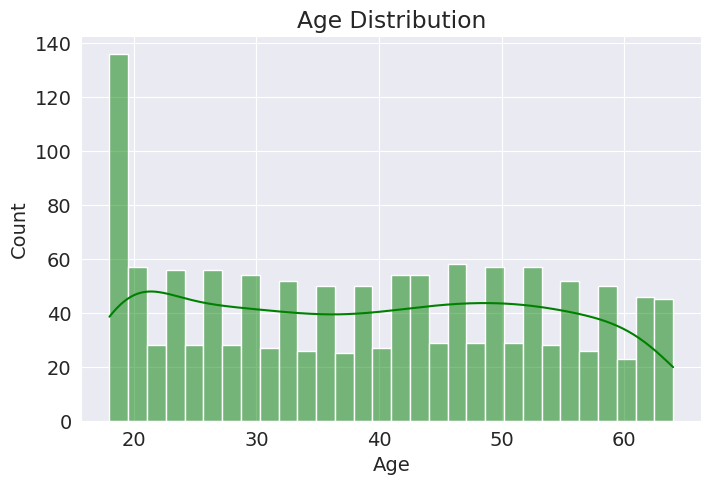

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(acme_data['age'], kde=True, bins=30, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()


There is a sharp peak at age 18, indicating a high number of young adults.

Apart from that, the age distribution appears fairly uniform across other age groups.

## Charges


Let's visualize the distribution of "charges"

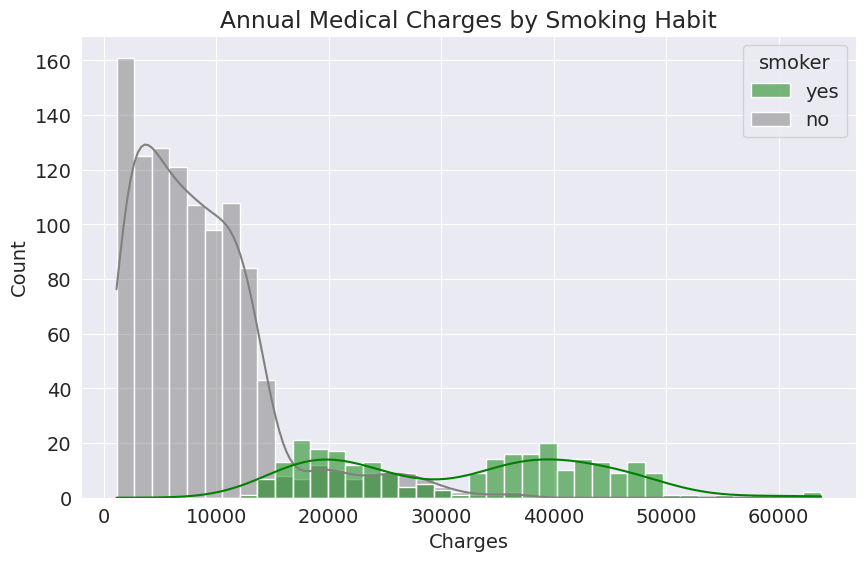

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=acme_data, x='charges', hue='smoker', bins=40, kde=True, palette=['green', 'grey'])
plt.title('Annual Medical Charges by Smoking Habit')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.grid(True)
plt.show()



For most customers, the annual medical charges are **under $10,000.** Only a small fraction of customer have higher medical expenses, possibly due to major accidents, illnesses or genetical diseases. The distribution follows a "power law".

There is a significant difference in medical expenses between smokers and non-smokers. While the **median for non-smokers is 7300** , **the median for smokers is close to 35,000$**

In [27]:
fig = px.histogram(acme_data,
                   x='charges',
                   color='region',
                   title='Annual Medical Charges: with Region')
fig.update_layout(bargap=0.1)
fig.show()

All four regions (southwest, southeast, northwest, northeast) have similar distributions.

No significant differences are observed in charge patterns across regions.



In [29]:

fig = px.histogram(acme_data,
                   x='charges',
                   color='sex',
                   color_discrete_sequence=px.colors.sequential.Rainbow,
                   title='Annual Medical Charges: with Sex')
fig.update_layout(bargap=0.1)
fig.show()

For most of our female customers, the annual medical charges are under $12K-14,000.


## Charges based on sex and age


In [30]:
fig = px.histogram(acme_data,
                   x = 'age',
                   y = 'charges',
                   color='sex',
                   title='Annual Medical Charges: Based on Age and Sex')
fig.update_layout(bargap=0.1)
fig.show()

In most age groups, males contribute more to the total charges than females.

After age 40, the charges from both sexes become more balanced but males still tend to dominate slightly.





## Smoker' Gender


In [31]:
px.histogram(acme_data, x='smoker', color='sex', title='Smoker')


The majority of individuals in the dataset are non-smokers.

We can also see that smoking appears a more common habit among males.



## Age and Charges


In [32]:

fig = px.scatter(acme_data,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

## BMI and Charges


In [33]:

fig = px.scatter(acme_data,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

t appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Children vs. Charges


In [35]:

fig = px.violin(acme_data,
                 x='children',
                 y='charges',
                 title='Children vs. Charges')
fig.update_traces()
fig.show()

The distribution of charges is fairly consistent across different numbers of children.

Most individuals, regardless of the number of children, tend to have charges below $20,000.

A few high-charge outliers are present in all groups, especially where the number of children is 0 to 3.

## Correlation


In [36]:
print("Correlation of charges and age: ", acme_data.charges.corr(acme_data.age))
print("Correlation of charges and bmi: ", acme_data.charges.corr(acme_data.bmi))
print("Correlation of charges and children: ", acme_data.charges.corr(acme_data.children))

# To compute the correlation for categorical columns, they must first be converted into numeric columns.
smoker_values = {'no': 0, 'yes': 1}
smokers = acme_data.smoker.map(smoker_values)
print("Correlation of charges and smoker: ", acme_data.charges.corr(smokers))

Correlation of charges and age:  0.2983082125097864
Correlation of charges and bmi:  0.1984008312262494
Correlation of charges and children:  0.06738935083963243
Correlation of charges and smoker:  0.7872343672800324


In [38]:

# Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.
acme_data.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

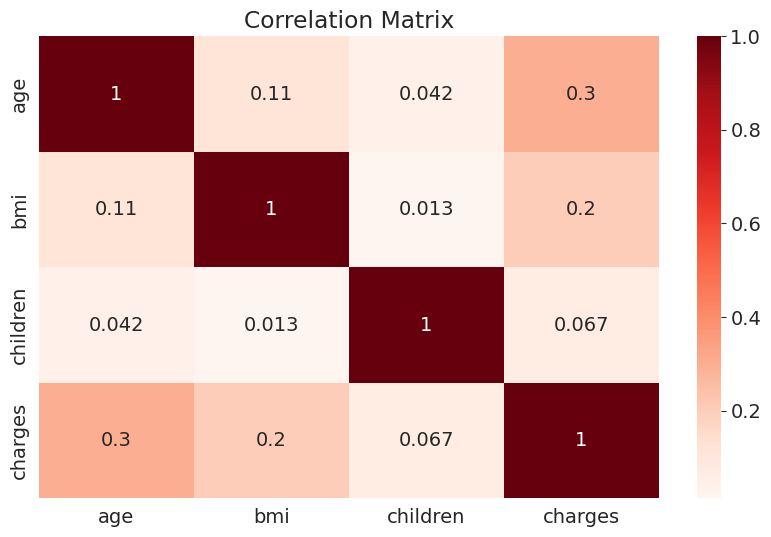

In [40]:
# The result of .corr is called a correlation matrix and is often visualized using a heatmap.
numeric_acme_data = acme_data.drop(['sex', 'region'], axis=1)
sns.heatmap(numeric_acme_data.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')



# Linear Regression using a Single Feature



We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

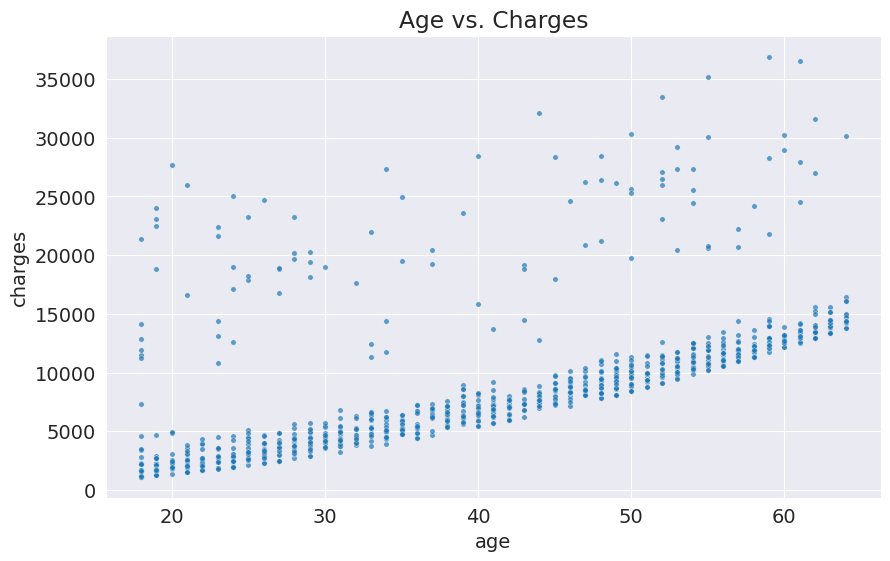

In [42]:
non_smoker_df = acme_data[acme_data.smoker == 'no']

# Let's visualize the relationship between "age" and "charges"
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);


## Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

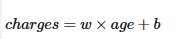

In [43]:

# The estimate_charges function is our very first model
def estimate_charges(age, w, b):
    return w * age + b

In [45]:

w = 200
b = 2000

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


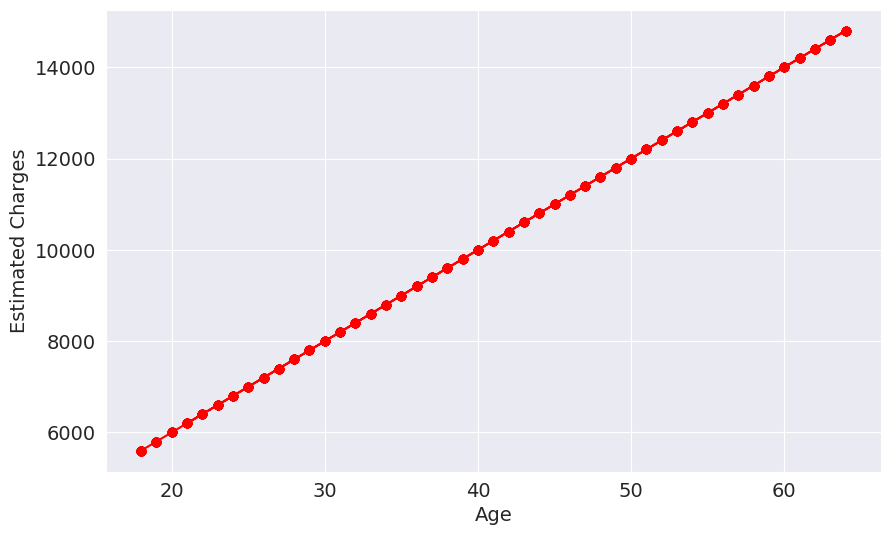

In [46]:

plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');


As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

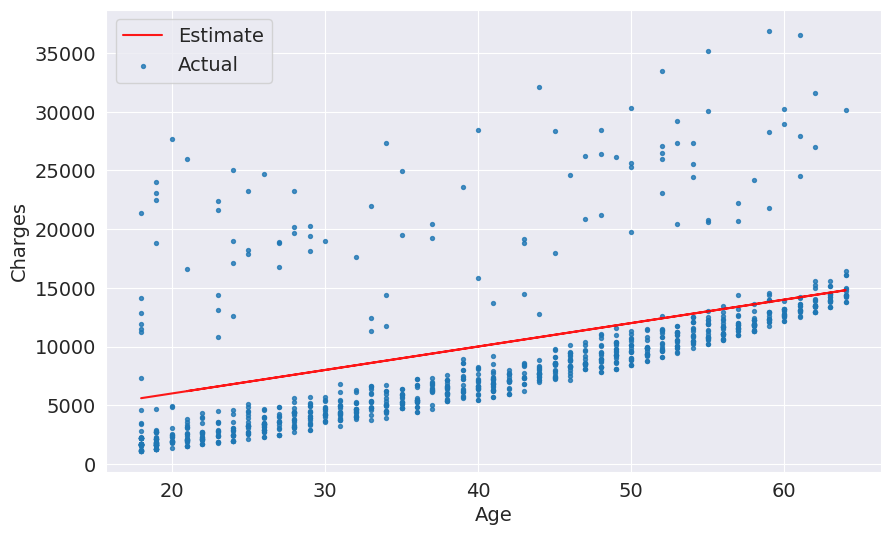

In [47]:

target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data.
   However, we can try different values of $w$ and $b$ to move the line around.
   Let's define a helper function `try_parameters` which takes `w` and `b` as
   inputs and creates the above plot.

In [48]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

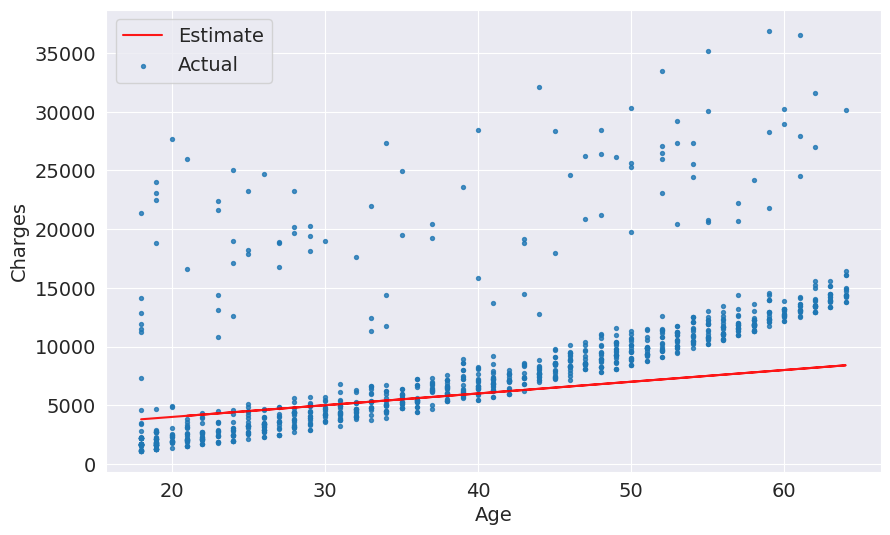

In [49]:
try_parameters(100, 2000)


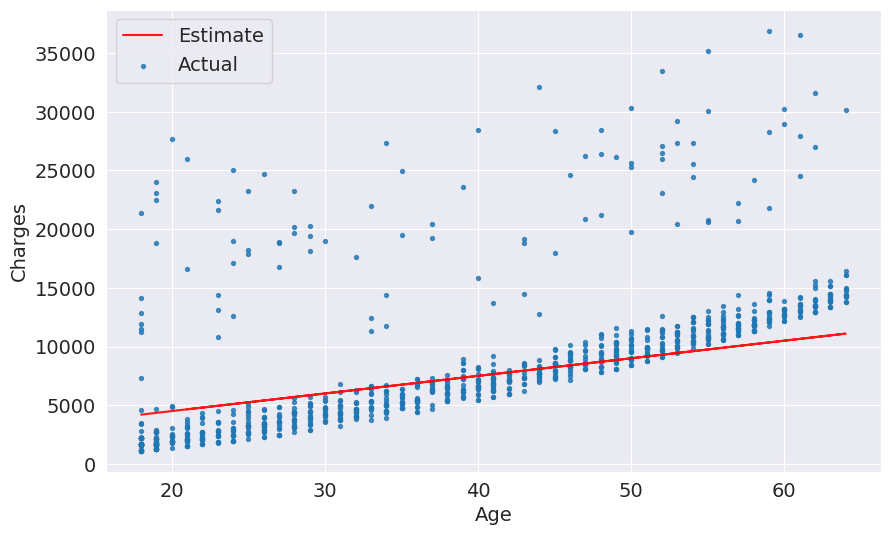

In [50]:
try_parameters(150, 1500)


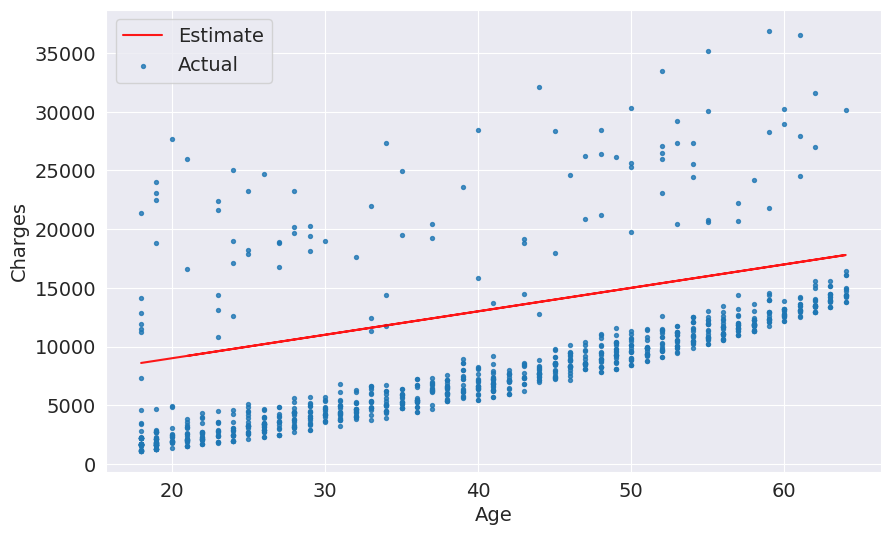

In [51]:
try_parameters(200, 5000)


We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

## Loss/Cost Function


In [52]:
import numpy as np


In [53]:

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

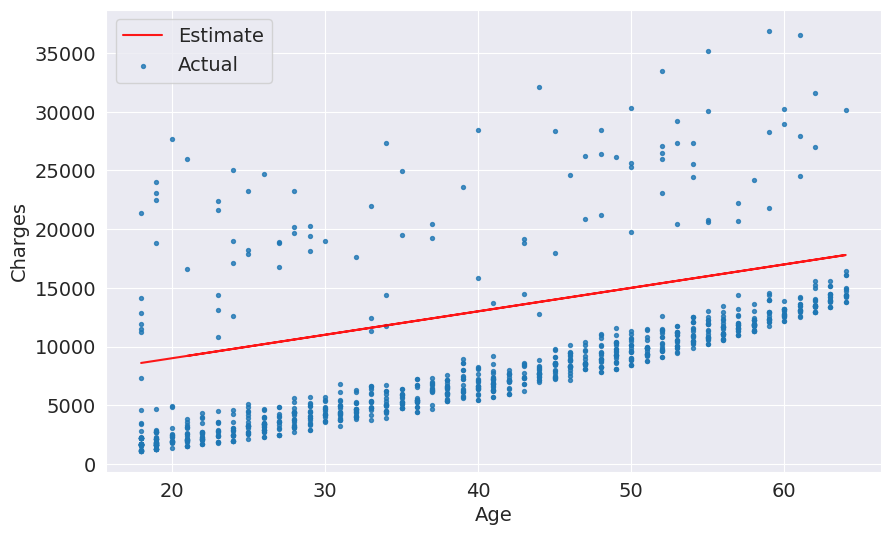

In [54]:

# Let's compute the RMSE for our model with a sample set of weights
w = 200
b = 5000
try_parameters(w, b)

In [55]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [56]:
rmse(targets, predicted)


np.float64(6508.855459678695)

he result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

If rmse(loss) is high means model is bad.

Let's modify the try_parameters functions to also display the loss.

In [57]:

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5529.368859696728


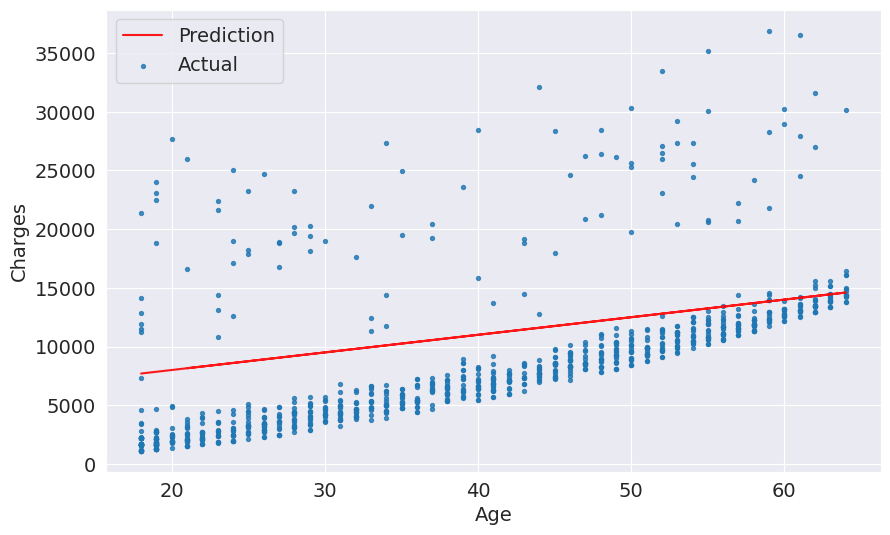

In [58]:
try_parameters(150, 5000)


RMSE Loss:  8192.289887086223


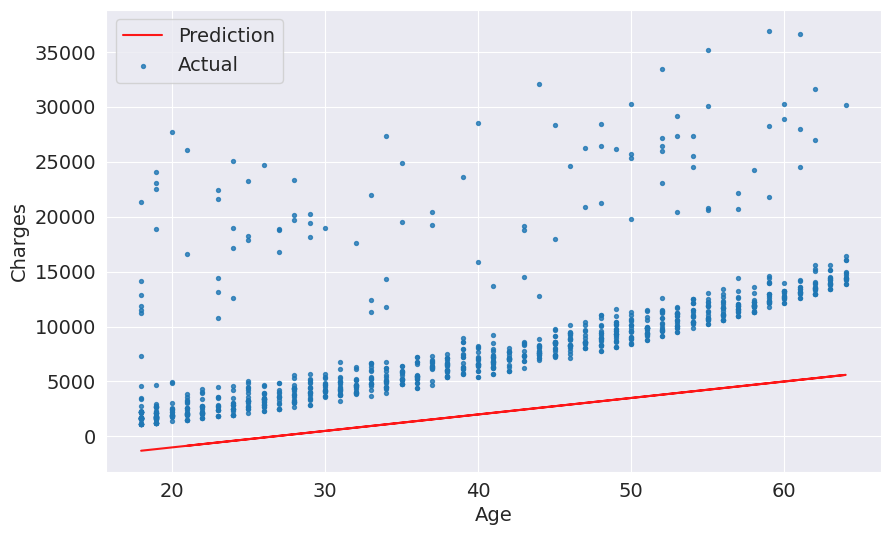

In [59]:
try_parameters(150, -4000)


RMSE Loss:  4994.24516372874


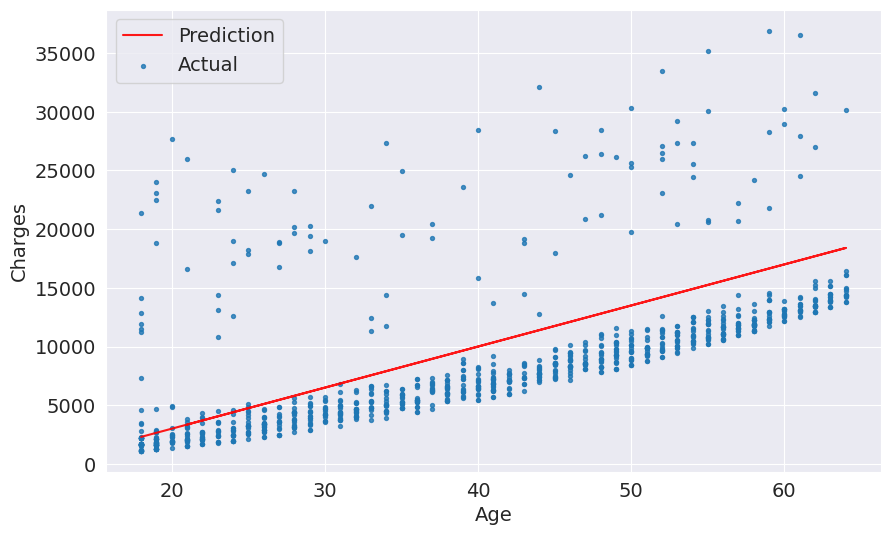

In [60]:
try_parameters(350, -4000)


## Linear Regression using Scikit-learn



In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
# New Model object
model = LinearRegression()

In [64]:
# Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1063, 1)
targes.shape : (1063,)


In [65]:
model.fit(inputs, targets)


LinearRegression()

In [66]:
# We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4058.71368614,  7798.37016075, 14209.20983152])

In [68]:
# Let compute the predictions for the entire set of inputs

predictions = model.predict(inputs)
predictions

array([2723.12208806, 5394.30528422, 6729.89688229, ..., 2723.12208806,
       2723.12208806, 3524.47704691])

In [69]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [70]:
predictions


array([2723.12208806, 5394.30528422, 6729.89688229, ..., 2723.12208806,
       2723.12208806, 3524.47704691])

In [71]:
targets


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [72]:

# Let's compute the RMSE loss to evaluate the model.
rmse(targets, predictions)

np.float64(4664.514914257795)

In [73]:
# The parameters of the model are stored in the `coef_` and `intercept_` properties.

# w
print("w : " , model.coef_)

# b
print("b :", model.intercept_)

w :  [267.11831962]
b : -2085.007665013907


RMSE Loss:  4664.514914257795


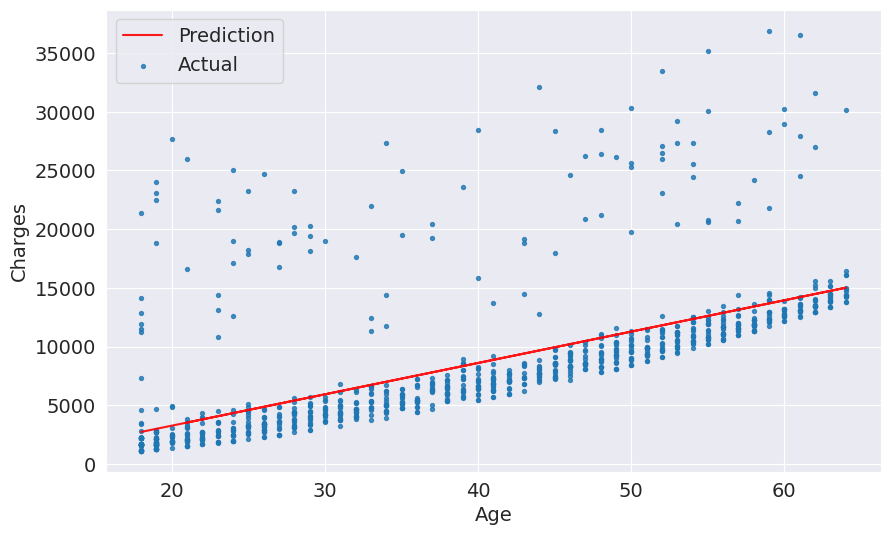

In [74]:
try_parameters(model.coef_, model.intercept_)


In [75]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4664.514914257795


## :Linear Regression using Multiple Features

we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

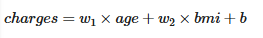



In [77]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4664.319926057651



As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [79]:
non_smoker_df.charges.corr(non_smoker_df.bmi)


np.float64(0.08407651699889863)

In [80]:

fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [81]:
model.coef_, model.intercept_


(array([266.74339853,   7.11137873]), np.float64(-2288.2110185727615))

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

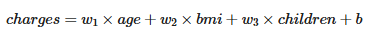

In [82]:
non_smoker_df.charges.corr(non_smoker_df.children)


np.float64(0.13810899788132755)

In [83]:

# Stripe Plot
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [84]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4610.57947744852


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.



To train a linear regression model to estimate medical charges for all customers.



In [85]:
# Create inputs and targets
inputs, targets = acme_data[['age', 'bmi', 'children']], acme_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11358.309791063164


## Using Categorical Features for Machine Learning


To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

If a categorical column has just **two categories**(it's called a binary category), then we can replace their values with 0 and 1.

If a categorical column has **more than 2 categories**, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.

If the categories have **a natural order** (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals.


# Binary Categories


<Axes: xlabel='smoker', ylabel='charges'>

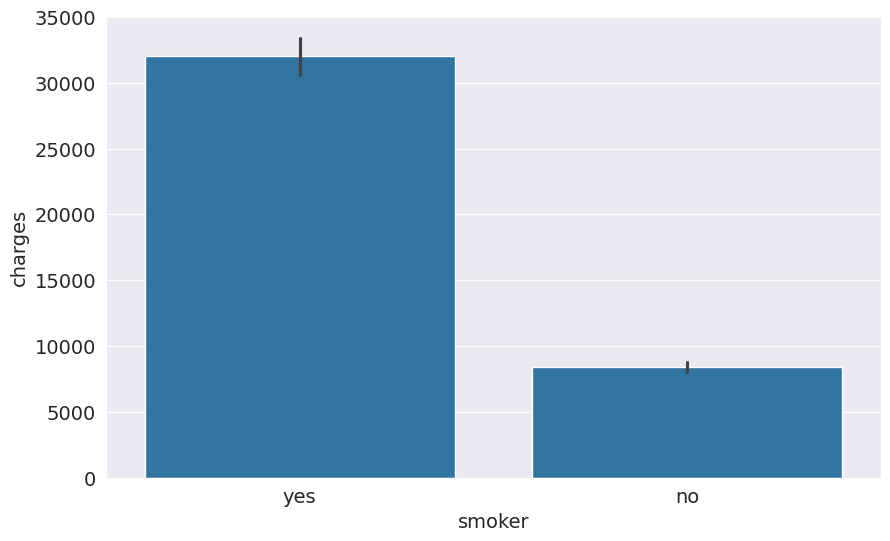

In [86]:
sns.barplot(data=acme_data, x='smoker', y='charges')


In [87]:

smoker_codes = {'no': 0, 'yes': 1}
acme_data['smoker_code'] = acme_data.smoker.map(smoker_codes)

In [88]:
acme_data.charges.corr(acme_data.smoker_code)


np.float64(0.7872343672800324)

We can now use the smoker_df column for linear regression.
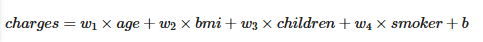

In [89]:

# Create inputs and targets
inputs, targets = acme_data[['age', 'bmi', 'children', 'smoker_code']], acme_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6058.641537157491



The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

Let's try adding the "sex" column as well.

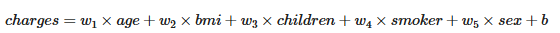

<Axes: xlabel='sex', ylabel='charges'>

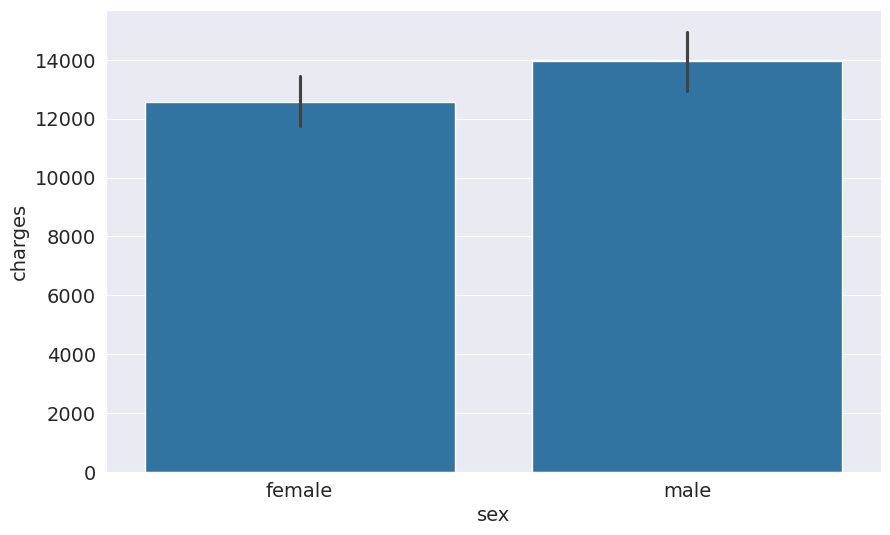

In [90]:
sns.barplot(data=acme_data, x='sex', y='charges')


In [91]:
sex_codes = {'female': 0, 'male': 1}
acme_data['sex_code'] = acme_data.sex.map(sex_codes)

# Correaltion btw charges and sex
acme_data.charges.corr(acme_data.sex_code)

np.float64(0.0580444957903129)

In [92]:
# Create inputs and targets
inputs, targets = acme_data[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], acme_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6058.310641972325


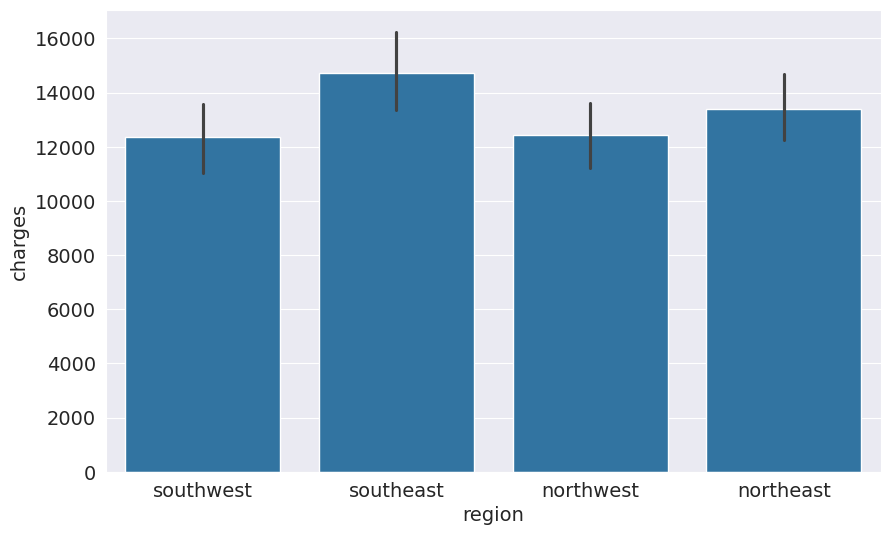

In [93]:
sns.barplot(data=acme_data, x='region', y='charges');


## One-hot Encoding


In [94]:

from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(acme_data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [95]:
one_hot = enc.transform(acme_data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [96]:
acme_data[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [97]:
acme_data


,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

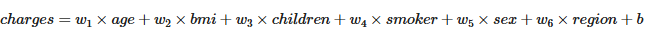

In [98]:
model.coef_


array([  257.66447661,   322.37667307,   473.90748038, 23822.3225364 ,
        -127.20952698])

In [99]:
model.intercept_


np.float64(-12049.328255872626)

In [101]:
weights_df = pd.DataFrame({
    'feature': np.append(inputs.columns, 'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,257.664477
1,bmi,322.376673
2,children,473.907480
3,smoker_code,23822.322536
4,sex_code,-127.209527
5,intercept,-12049.328256


We can apply scaling using the StandardScaler class from scikit-learn.



In [102]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(acme_data[numeric_cols])
print(scaler.mean_)
print(scaler.var_)

[39.22213912 30.66345176  1.09573672]
[197.09575518  37.18787958   1.45231541]


In [103]:
scaled_inputs = scaler.transform(acme_data[numeric_cols])
scaled_inputs

array([[-1.44041773, -0.45315959, -0.90923416],
       [-1.51164747,  0.50942165, -0.07944162],
       [-0.79935006,  0.3831546 ,  1.58014347],
       ...,
       [-1.51164747,  1.01448983, -0.90923416],
       [-1.29795825, -0.79752426, -0.90923416],
       [ 1.55123139, -0.26129928, -0.90923416]])

In [104]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = acme_data[cat_cols].values

In [105]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = acme_data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6043.849901947357


We can now compare the weights in the formula:



In [106]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23847.328844
9,1,8471.021802
0,age,3604.738802
1,bmi,2068.812016
5,northeast,586.143380
2,children,572.215898
6,northwest,236.916848
4,sex_code,-129.481478
8,southwest,-373.938006
7,southeast,-449.122222


## Creating a Test Set


In [107]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [108]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6640.056968591055


In [109]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5976.640026623092
